# CONSOLIDATE DatePrep

In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:

DEBUG = True
seed = 1919


In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:
# Import the Base Dataset
base_dataset_name = 'dataset_base_2022-11-19.csv'

df_base_raw = pd.read_csv(f'{fileloc}/{base_dataset_name}')

print(df_base_raw.shape)
print()
print(df_base_raw.columns.values.tolist())


(541552, 21)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos']


In [8]:

print(pd.DataFrame(df_base_raw.isna().sum()).transpose())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  position  x_num_dogs  Winner_actual  Top3_actual  position_random  Winner_random  Top3_random  \
0        0        0          0       0         0         0          0      0         0      0         0           0              0            0                0              0            0   

   position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  
0                   0                0              0      0  


In [9]:
# Import the Speed Profile

speed_profile_name = 'dataprep_speed_profile_2022-10-27.csv'

df_speed_profile = pd.read_csv(f'{fileloc}/{speed_profile_name}')

print(df_speed_profile.shape)
print()
print(df_speed_profile.columns.values.tolist())


(577317, 11)

['@id_DOG', '@id_RACE', 'x_dist', 'x_races_tot', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std']


In [10]:

print(pd.DataFrame(df_speed_profile.isna().sum()).transpose())


   @id_DOG  @id_RACE  x_dist  x_races_tot  x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  x_speed_max  x_speed_range  x_speed_std
0        0         0       0            0                0             0            0            0            0              0            0


In [11]:

# Import the Race Profile
race_profile_name = 'dataprep_raceprofile_2022-10-29.csv'

df_race_profile = pd.read_csv(f'{fileloc}/{race_profile_name}')

print(df_race_profile.shape)
print()
print(df_race_profile.columns.values.tolist())


(541552, 16)

['@id_DOG', '@id_RACE', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1']


In [89]:

# Merge the datasets together
print(df_base_raw.shape)
print(df_speed_profile.shape)
print(df_race_profile.shape)
print()

df_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base0.shape)    
print(df_base0.columns.values.tolist())    

df_base1 = pd.merge( df_base0, df_race_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base1.shape)
print(df_base1.columns.values.tolist())


(541552, 21)
(577317, 11)
(541552, 16)

(541552, 30)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_dist', 'x_races_tot', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std']
(541552, 44)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_dist', 'x_races_tot', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp',

### Normalising the x_speed_prev in Each RaceId

In [84]:

"""
NOTE:
    When mean is 0 created flag - No Prev Races
    When std is 0 create flag - No Std
    
Q Sau takke ka sawaal ? 
    Missing Norm values be replaced with 0 or 0.5.
        Currently used 0.5    

print(datetime.now())

ds_norm = df_base1.groupby('@id_RACE')['x_speed_prev'].agg( ['mean','std'] ).reset_index().rename(columns = {'mean':'x_speed_prev_mean', 'std':'x_speed_prev_std'} )

df_base1 = df_base1.merge( ds_norm , on = '@id_RACE' )
df_base1['x_no_speed_prev_std'] = df_base1['x_speed_prev_std'].apply(lambda x : 1 if x == 0 else 0 )

df_base1['x_speed_prev_norm'] = (df_base1['x_speed_prev'] - df_base1['x_speed_prev_mean']) / df_base1['x_speed_prev_std']
df_base1['x_speed_prev_norm'] = df_base1.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1) 
#df_base1['x_speed_prev_norm'] = df_base1['x_speed_prev_norm'].fillna(0.5)

"""

print(datetime.now())


2022-11-20 01:15:02.828471
2022-11-20 01:15:19.473762


In [85]:

# QC the Transformation

print(pd.DataFrame(df_base1.isna().sum()).transpose())

#df_base2.groupby('x_no_prev_races')['x_speed_prev_std'].isna().sum()
#df_base2.groupby('x_no_prev_races')[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.isna().sum())
#df_base1.groupby(['x_no_prev_races','x_no_speed_prev_std'])[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.eq(0).sum())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  position  x_num_dogs  Winner_actual  Top3_actual  position_random  Winner_random  Top3_random  \
0        0        0          0       0         0         0          0      0         0      0         0           0              0            0                0              0            0   

   position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  x_dist  x_races_tot  x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  x_speed_max  x_speed_range  x_speed_std  G5  G4  G3  G2  \
0                   0                0              0      0       0            0                0             0            0            0            0              0            0   0   0   0   0   

   G1  Gmix  Gmas  Gmai  Gh  Gres  Gnov  Gsp  Gfin  RaceGrade_H1  x_speed_prev_mean  x_speed_prev_std  x_no_speed_prev_std  x_speed_prev_norm  
0   0     0     0     0   0     0     0    0     0             0        

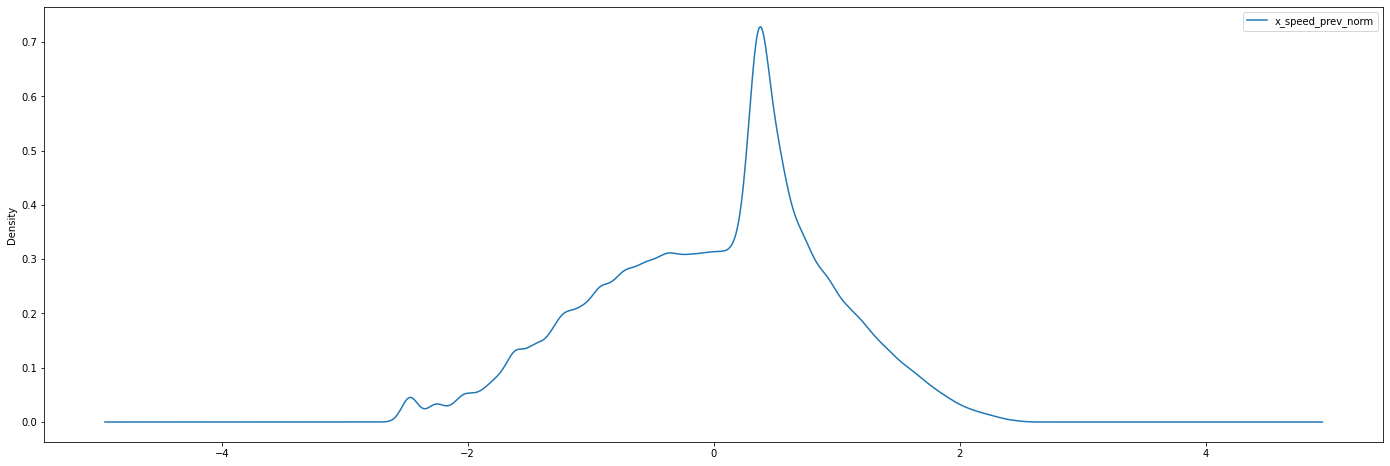

In [86]:

df_base1['x_speed_prev_norm'].plot( kind='density', legend=True, figsize = (24,8) )


In [90]:

# Normalising multiple columns in loop

print(datetime.now())

cols_to_norm = ['x_races_tot' ,'x_speed_prev' ,'x_speed_avg' ,'x_speed_min' ,'x_speed_max' ,'x_speed_range']

for curr_col in cols_to_norm:
    
    mean_name = curr_col + '_mean'
    std_name = curr_col + '_std'
    no_std_name = curr_col + '_std' + '_no'
    norm_name = curr_col + '_norm'
    
    print(mean_name, std_name, norm_name)

    ds_norm = df_base1.groupby('@id_RACE')[curr_col].agg(['mean','std']).reset_index().rename(columns = {'mean':mean_name, 'std':std_name})

    df_base1 = df_base1.merge(ds_norm , on = '@id_RACE')
    df_base1[no_std_name] = df_base1[std_name].apply(lambda x : 1 if x == 0 else 0)

    #df_base1[norm_name] = (df_base1[curr_col] - df_base1[mean_name]) / df_base1[std_name]    
    #df_base1['x_speed_prev_norm'] = df_base1.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1) 
    df_base1[norm_name] = df_base1.apply(lambda x : 0.5 if (x[mean_name] == 0) | (x[std_name] == 0) | (pd.isna(x[std_name])) else ( x[curr_col] - x[mean_name] ) / x[std_name], axis = 1)    
    #df_base1[norm_name] = df_base1[norm_name].fillna(0.5)
    
    df_base1.drop(columns = [mean_name, std_name], inplace = True)

print(datetime.now())


2022-11-20 01:19:39.614954
x_races_tot_mean x_races_tot_std x_races_tot_norm
x_speed_prev_mean x_speed_prev_std x_speed_prev_norm
x_speed_avg_mean x_speed_avg_std x_speed_avg_norm
x_speed_min_mean x_speed_min_std x_speed_min_norm
x_speed_max_mean x_speed_max_std x_speed_max_norm
x_speed_range_mean x_speed_range_std x_speed_range_norm
2022-11-20 01:20:41.282133


In [91]:

print(df_base1.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_dist', 'x_races_tot', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot_std_no', 'x_races_tot_norm', 'x_speed_prev_std_no', 'x_speed_prev_norm', 'x_speed_avg_std_no', 'x_speed_avg_norm', 'x_speed_min_std_no', 'x_speed_min_norm', 'x_speed_max_std_no', 'x_speed_max_norm', 'x_speed_range_std_no', 'x_speed_range_norm']


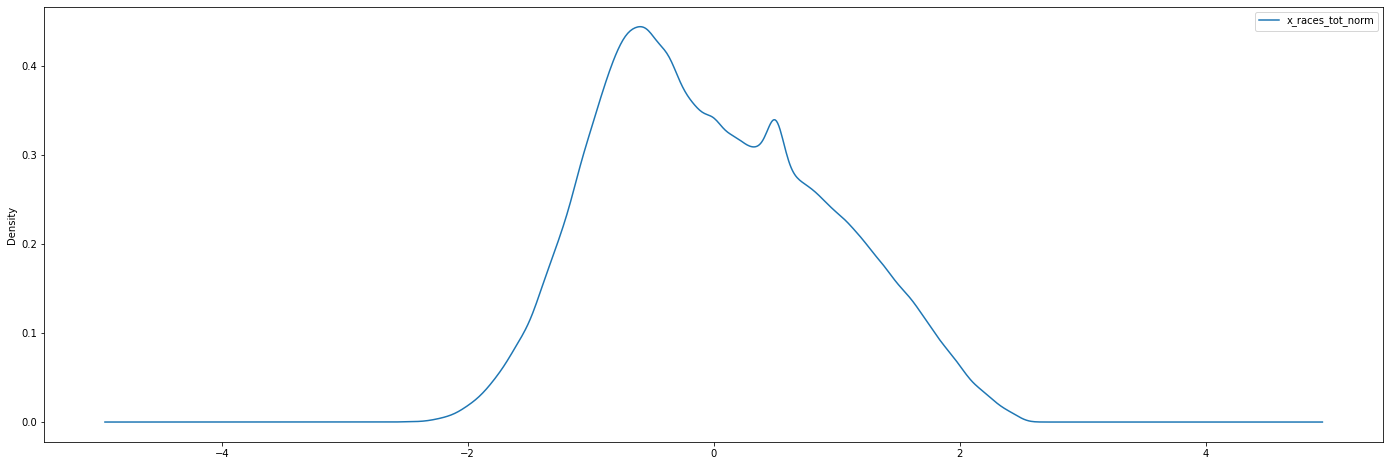

In [99]:

df_base1['x_races_tot_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base1['x_speed_prev_norm'].plot( kind='density', legend=True, figsize = (24,8) )


In [93]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random']

cols_for_drop = []

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'modeling_base_{todaydt}.csv'

exp_ds = df_base1.drop(columns = cols_for_drop)


In [95]:

exp_ds.tail()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,position,x_num_dogs,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_dist,x_races_tot,x_no_prev_races,x_speed_prev,...,G4,G3,G2,G1,Gmix,Gmas,Gmai,Gh,Gres,Gnov,Gsp,Gfin,RaceGrade_H1,x_races_tot_std_no,x_races_tot_norm,x_speed_prev_std_no,x_speed_prev_norm,x_speed_avg_std_no,x_speed_avg_norm,x_speed_min_std_no,x_speed_min_norm,x_speed_max_std_no,x_speed_max_norm,x_speed_range_std_no,x_speed_range_norm
541547,1478450099,BAD BOY DELLY,16.39,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,34.00,4,6,0,0,1.0,1,1,4.0,0,0,4,272,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,Other,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5
541548,1701190008,SWIZZ ROLL CLOUD,15.87,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,3.80,1,6,1,1,2.0,0,1,2.0,0,1,1,272,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,Other,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5
541549,1907950051,ALDERLEY ROX,16.84,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,101.00,6,6,0,0,6.0,0,0,6.0,0,0,6,272,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,Other,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5
541550,2035650008,ALPINE LITTLE,15.95,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,1.55,2,6,0,1,3.0,0,1,1.0,1,1,2,272,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,Other,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5
541551,2116930017,MY RAINMAKER,16.57,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,81.00,5,6,0,0,5.0,0,0,5.0,0,0,5,272,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,Other,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5


In [96]:

exp_ds.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,position,x_num_dogs,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_dist,x_races_tot,x_no_prev_races,x_speed_prev,x_speed_avg,x_speed_min,x_speed_max,x_speed_range,x_speed_std,G5,G4,G3,G2,G1,Gmix,Gmas,Gmai,Gh,Gres,Gnov,Gsp,Gfin,x_races_tot_std_no,x_races_tot_norm,x_speed_prev_std_no,x_speed_prev_norm,x_speed_avg_std_no,x_speed_avg_norm,x_speed_min_std_no,x_speed_min_norm,x_speed_max_std_no,x_speed_max_norm,x_speed_range_std_no,x_speed_range_norm
count,5.415520e+05,541552.000000,5.415520e+05,5.415520e+05,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000
mean,4.525647e+08,24.427979,7.292605e+08,7.292605e+08,16.917818,4.150733,7.305492,0.140127,0.419843,4.152746,0.139857,0.419435,4.013938,0.145510,0.437633,4.150733,417.353562,18.734123,0.049223,16258.984439,16372.453807,15870.525764,16780.460082,909.891907,258.242292,0.401710,0.014992,0.003147,0.001078,0.004627,0.173540,0.021322,0.151780,0.103178,0.053805,0.037082,0.032721,0.042683,0.007656,0.003845,0.006821,0.003427,0.006795,0.003414,0.006795,0.003414,0.006795,0.003414,0.007471,0.003752
std,1.121930e+08,4.983891,5.831714e+07,5.831714e+07,20.995473,2.160054,0.950365,0.347119,0.493534,2.159921,0.346839,0.493467,2.088645,0.352614,0.496096,2.160054,83.856726,16.097282,0.216334,3723.162924,3460.682737,3376.122418,3576.492040,705.188284,201.697242,0.490244,0.121521,0.056006,0.032821,0.067868,0.378714,0.144456,0.358808,0.304191,0.225632,0.188964,0.177905,0.202141,0.087162,0.924927,0.082308,0.925198,0.082153,0.925206,0.082153,0.925206,0.082153,0.925206,0.086112,0.924985
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.474874,0.000000,-2.474803,0.000000,-2.474852,0.000000,-2.474788,0.000000,-2.474815,0.000000,-2.474874
25%,3.836042e+08,20.550000,6.802578e+08,6.802578e+08,4.200000,2.000000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,350.000000,6.000000,0.000000,16795.865633,16881.052752,16306.695464,17237.442922,568.752099,186.539074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.712055,0.000000,-0.649582,0.000000,-0.672467,0.000000,-0.620811,0.000000,-0.679714,0.000000,-0.678904
50%,4.517679e+08,23.540000,7.293859e+08,7.293859e+08,8.700000,4.000000,8.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,400.000000,15.000000,0.000000,17084.890550,17102.524362,16601.453326,17513.513514,881.521254,250.024868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.099873,0.000000,0.163156,0.000000,0.067932,0.000000,0.177251,0.000000,0.056865,0.000000,-0.113772
75%,5.271657e+08,27.190000,7.792436e+08,7.792436e+08,20.600000,6.000000,8.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000,461.000000,28.000000,0.000000,17347.670251,17287.706370,16842.105263,17747.193046,1177.824156,318.220158,1.000000,0.000000,0.0

In [100]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [98]:

print("THE END")


THE END
